# importing libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datasist as ds

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [16]:
data = pd.read_csv('Country-data.csv')

In [17]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
data.shape

(167, 10)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [20]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [21]:
data.isnull().sum().any()

False

# converting the catigorical values to the numerical 

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
data['country'] = lb.fit_transform(data['country'])
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# set the model

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)

    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_


C:\Users\pop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
for key, val in mapping1.items():
    print(f'{key} : {val}')
    


1 : 19671.530334072526
2 : 10505.781763406712
3 : 9100.850710337358
4 : 7091.243258943015
5 : 5516.762001469357
6 : 4866.028747710041
7 : 4431.759505834638
8 : 4190.8530380378315
9 : 3377.2507297519837


# Elbow Method

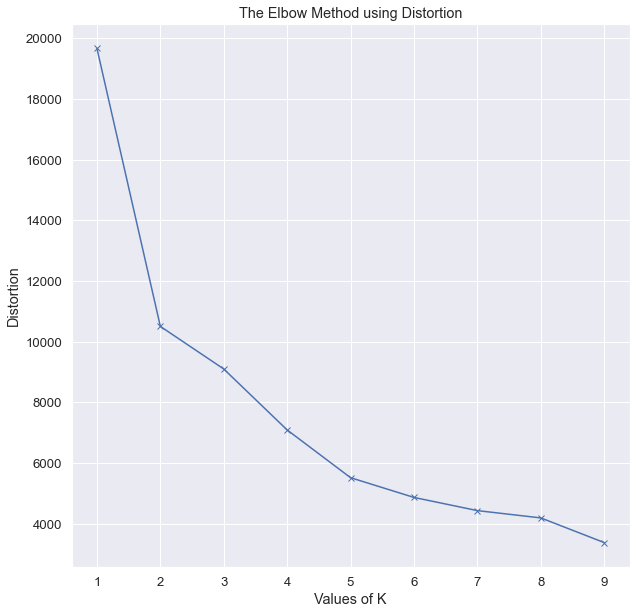

In [25]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


# taking k=2

In [26]:
kmodel = KMeans(n_clusters=2)
kmodel.fit(data)

KMeans(n_clusters=2)

In [27]:
some_data = data.iloc[:10]
some_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [28]:
print('Predictions : ',kmodel.predict(some_data))

Predictions :  [0 0 0 0 0 0 0 1 1 0]
